<a href="https://colab.research.google.com/github/lanreayk/Product-Sales-Data-Analysis/blob/main/Product_Sales_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#loading google drive to access the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#add file location/path
path = '/content/drive/MyDrive/product_sales.csv'

In [5]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
# Independent t-test (two-sample t-test)
from scipy import stats

In [7]:
# Load product sales data from CSV file
df = pd.read_csv(path)
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [8]:
# check validity of week column
df.week.info()
df.week.unique()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: week
Non-Null Count  Dtype
--------------  -----
15000 non-null  int64
dtypes: int64(1)
memory usage: 117.3 KB


array([2, 6, 5, 4, 3, 1])

# week: Six (6) distinct values,without missing number. Its the same as described

In [9]:
# sales-method validity test
df['sales_method'].info()
df['sales_method'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: sales_method
Non-Null Count  Dtype 
--------------  ----- 
15000 non-null  object
dtypes: object(1)
memory usage: 117.3+ KB


array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [10]:
# No null values but the label is not consistent, rename the inconsistent "em + call" with "Email + Call"
df.replace(['em + call','email'], ['Email + Call','Email'], inplace=True)

df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

# sales_method: there was five(5) unique items instead of three (3). the fifth item was mislabelled and it was correct from "em + call" to "Email + Call". This adjusts the the no of unique items to three (3) instead of the eroneous five (5). data cleaning done

In [11]:
# customer ID check
df['customer_id'].info()
df['customer_id'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: customer_id
Non-Null Count  Dtype 
--------------  ----- 
15000 non-null  object
dtypes: object(1)
memory usage: 117.3+ KB


array(['2e72d641-95ac-497b-bbf8-4861764a7097',
       '3998a98d-70f5-44f7-942e-789bb8ad2fe7',
       'd1de9884-8059-4065-b10f-86eef57e4a44', ...,
       '839653cb-68c9-48cb-a097-0a5a3b2b298b',
       'e4dad70a-b23b-407c-8bd3-e32ea00fae17',
       '4e077235-7c17-4054-9997-7a890336a214'], dtype=object)

# customer_id: String values,without missing number. Its the same as described. no cleaning is needed

In [12]:
#nb_sold check
df['nb_sold'].info()
df['nb_sold'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: nb_sold
Non-Null Count  Dtype
--------------  -----
15000 non-null  int64
dtypes: int64(1)
memory usage: 117.3 KB


array([10, 15, 11,  9, 13,  8, 12,  7, 14, 16])

In [13]:
# revenue check
df['revenue'].info()
df['revenue'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
13926 non-null  float64
dtypes: float64(1)
memory usage: 117.3 KB


array([   nan, 225.47,  52.55, ...,  44.34,  45.01,  64.9 ])

In [14]:
df['revenue'].isna().sum()

1074

,revenue
count,13926.000000
mean,93.934943
std,47.435312
min,32.540000
25%,52.470000
50%,89.500000
75%,107.327500
max,238.320000


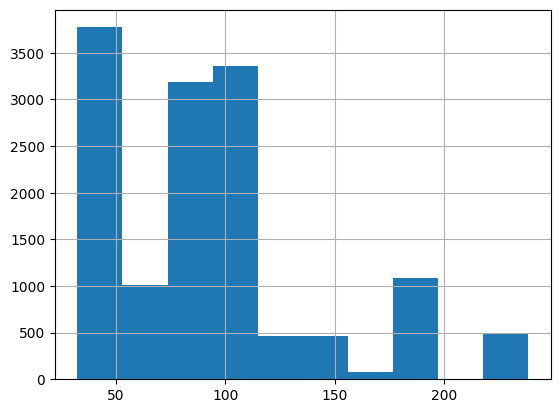

In [15]:
df['revenue'].hist()
df['revenue'].describe()

In [16]:
df['revenue']=round(df['revenue'],2)
df['revenue'].head()

,revenue
0,NaN
1,225.47
2,52.55
3,NaN
4,90.49


In [17]:
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [18]:

# Reshape the 'revenue' column to a 2D array
revenue_data = df['revenue'].values.reshape(-1, 1)

# Initialize the SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit and transform the 'revenue' column
df['revenue'] = imputer.fit_transform(revenue_data)

In [19]:
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,93.934943,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.470000,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.550000,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,93.934943,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.490000,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.820000,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.330000,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.870000,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.900000,2,27,New Jersey


In [20]:
# years_as_customer check
df['years_as_customer'].info()
df['years_as_customer'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: years_as_customer
Non-Null Count  Dtype
--------------  -----
15000 non-null  int64
dtypes: int64(1)
memory usage: 117.3 KB


array([ 0,  1,  6,  3, 10,  9,  7,  4,  2, 20,  8,  5, 17, 36, 15, 14, 19,
       13, 12, 11, 30, 24, 22, 18, 26, 23, 32, 16, 39, 25, 33, 21, 31, 27,
       34, 28, 29, 35, 38, 37, 63, 47])

# years_as_customer: contains 42 unique numeric values and no missing values. same as described and no data cleaning needed

In [21]:
# nb_site_visits check
df['nb_site_visits'].info()
df['nb_site_visits'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: nb_site_visits
Non-Null Count  Dtype
--------------  -----
15000 non-null  int64
dtypes: int64(1)
memory usage: 117.3 KB


array([24, 28, 26, 25, 22, 31, 23, 30, 21, 27, 32, 29, 20, 18, 19, 35, 16,
       17, 33, 36, 34, 15, 37, 14, 13, 12, 41])

# nb_site_visits: has 27 unique number and no missing values. its same as described and no data cleaning needed

In [22]:
# state check
df['state'].info()
df['state'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: state
Non-Null Count  Dtype 
--------------  ----- 
15000 non-null  object
dtypes: object(1)
memory usage: 117.3+ KB


array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

# state: 50 states without missing items, same as described and no data cleaning needed

# How Different Sales Methods Contribute to Sales
A simple frequency plot showed that sales by Email is half of the total number of sales frequency over the past 6 weeks

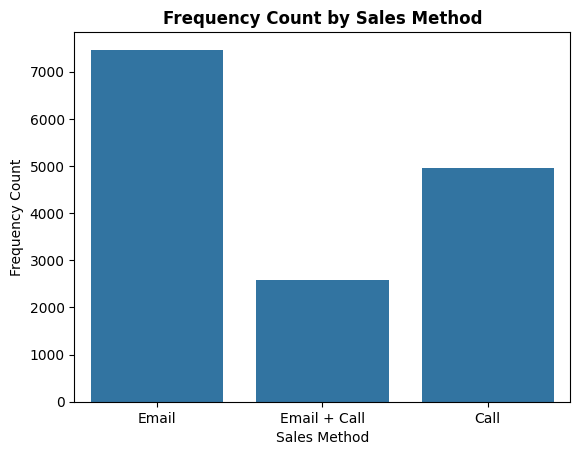

In [23]:
sns.countplot(data=df, x=df['sales_method'])
plt.xlabel('Sales Method')
plt.ylabel('Frequency Count')
plt.title('Frequency Count by Sales Method',weight='bold')
plt.xticks(rotation=0)
plt.show()

# When we look at the total sum of items sold per sales method, The number of items sold by "Email" is about 50% of the total number of items sold followed by "Call" and "Email + Call" has the least.

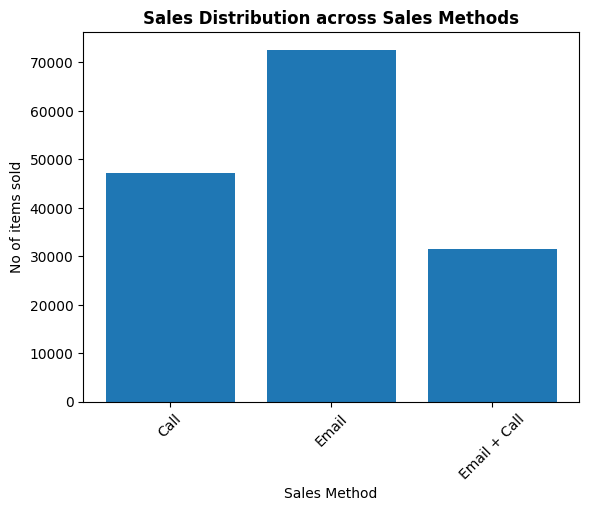

In [24]:
# sales method vs count of sales
grouped_data=df.groupby('sales_method')['nb_sold'].sum()
# Plot the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Sales Method')
plt.ylabel('No of items sold')
plt.title('Sales Distribution across Sales Methods',weight='bold')
plt.xticks(rotation=45)
plt.show()

In [25]:
grouped_data=df.groupby('sales_method')['nb_sold'].sum()
print("Total sales by Email group:", grouped_data['Email'])
print("Total sales by Call group:", grouped_data['Call'])
print("Total sales by (Email + call) group:", grouped_data['Email + Call'])

Total sales by Email group: 72639
Total sales by Call group: 47187
Total sales by (Email + call) group: 31444


# A plot of revenue by Sales method also shows the "Email" method as the one with over 50% revenue generated over the past 6 weeks. All these results points to "Email" sales method as the best method to promote sales.

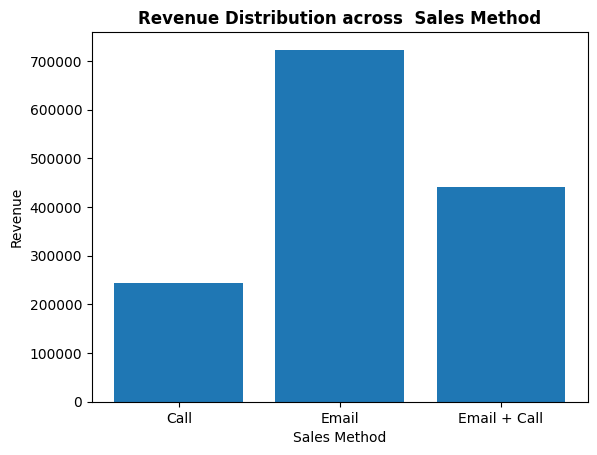

In [26]:
# sales method vs count of sales
grouped_data=df.groupby('sales_method')['revenue'].sum()
# Plot the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Revenue Distribution across  Sales Method',weight='bold')
plt.xticks(rotation=0)
plt.show()

In [27]:
grouped_data=df.groupby('sales_method')['revenue'].sum()
print("Revenue sales by Email group:", grouped_data['Email'])
print("Revenue sales by Call group:", grouped_data['Call'])
print("Revenue sales by (Email + call) group:", grouped_data['Email + Call'])

Revenue sales by Email group: 723418.4387491024
Revenue sales by Call group: 244565.71460218297
Revenue sales by (Email + call) group: 441039.98495117045


# However, upon plotting the boxplot of revenue against sales method, A different result was obtained with "Email + Call" method having a significantly higher revenue than "Email" and "Call" methods respectively. The box plot showed that the "Email" revenue data is plaqued with many outliers, hence the eronious appearance as the best sales method when summed. Therefore, further analysis is needed to determine what sales method is truely responsible for most of the generated revenue.

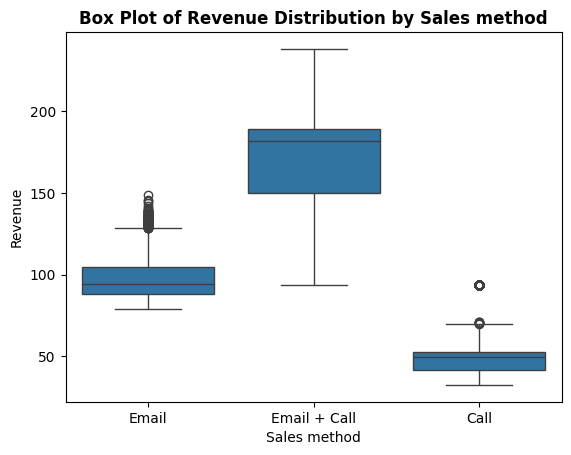

In [28]:
sns.boxplot(x='sales_method', y='revenue', data=df)
plt.xlabel('Sales method')
plt.ylabel('Revenue')
plt.title('Box Plot of Revenue Distribution by Sales method', weight='bold')
plt.xticks(rotation=0)
plt.show()

# Checking the variability in number of sales across the weeks showed that the sales by "Email" is significantly decreasing as the week progresses, with highest value in week one and lowest in week 6. Hence, its not a reliable indicator of best sales method. "Call" is fairly constant in number of items sold while "Email + Call" appears to be significantly increasing as the week progresses.

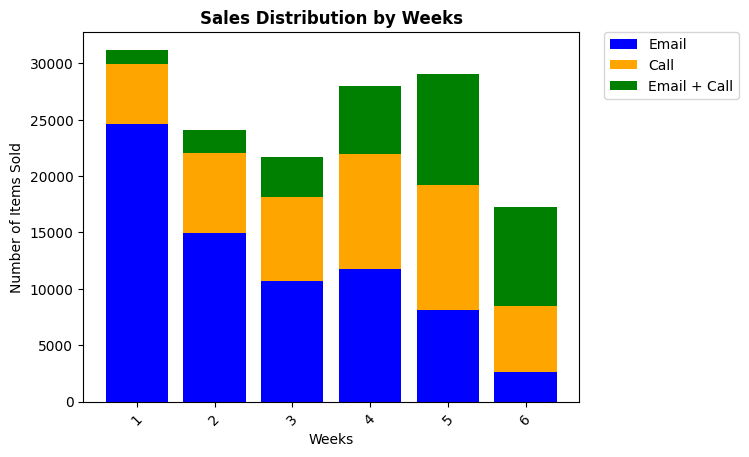

In [29]:
# Pivot the data to create a stacked bar chart
pivot_data = df.pivot_table(index='week', columns='sales_method', values='nb_sold', aggfunc='sum', fill_value=0)

# Plot the stacked bar chart
plt.bar(pivot_data.index, pivot_data['Email'], label='Email', color='blue')
plt.bar(pivot_data.index, pivot_data['Call'], bottom=pivot_data['Email'], label='Call', color='orange')
plt.bar(pivot_data.index, pivot_data['Email + Call'], bottom=pivot_data['Email'] + pivot_data['Call'], label='Email + Call', color='green')

plt.xlabel('Weeks')
plt.ylabel('Number of Items Sold')
plt.title('Sales Distribution by Weeks',weight='bold')
#plt.legend()
# Adjust the position of the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.show()

# Metric for determining best sales method

 ## A plot of the number of customers by Sales methods showed significant variability in the number of customers with "Email" method having about 50% of the customers in its group, hence the reason for its large sales and no connection to its efficiency as a sales method. Since the number of customers in each sales group is largely different, a sum or count of sales is not a reliable metric for determining best sales method, a mean/average value which takes into consideration the no of customers is a much better reliable performance metric.  

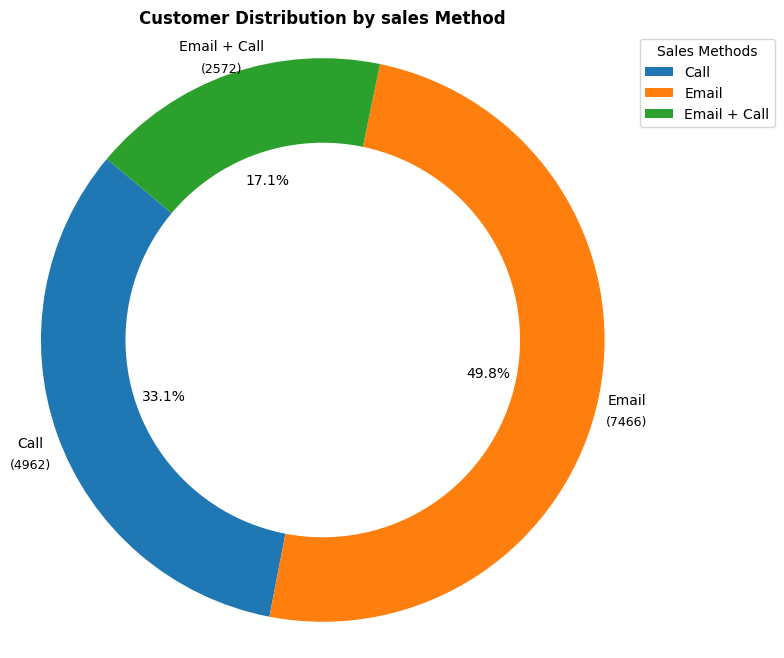

In [30]:
import matplotlib.pyplot as plt
import numpy as np


# sales method vs No of customers
grouped_data = df.groupby('sales_method')['customer_id'].count()

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a legend
plt.legend(grouped_data.index, title="Sales Methods", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Customer Distribution by sales Method',weight='bold')

# Calculate the angle for each wedge
angles = [(w.theta2 - w.theta1)/2 + w.theta1 for w in wedges]

# Adjust the position of the sector labels (texts) and place the count labels (autotexts) inside each sector
for text, autotext, angle, count in zip(texts, autotexts, angles, grouped_data.values):
    # Set the position of the sector label (sales_method)
    text.set_horizontalalignment('center')
    text.set_verticalalignment('center')
    text.set_color('black')

    # Adjust the position and color of the percentage inside the sector
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')
    autotext.set_color('black')  # Ensure the color contrasts with the pie slice

    # Set the position of the count label below the sector label
    x = 1.1 * np.cos(np.deg2rad(angle))
    y = 1.1 * np.sin(np.deg2rad(angle))
    plt.text(x, y - 0.10, f'({count})', ha='center', va='bottom', color='black', fontsize=9)

# Show the plot
plt.show()

# Hence, the right metric to evaluate performance of the sales method is the average/mean revenue genereated by each sales method. A plot of the mean revenue by sales method showed "Email + Call" method as the best performed sales method with a significanly higher average revenue (the p-value of the t-test was < 0.05) that is more than half (54%) of the total average revenue of all sales methods put together. The second in performance is the "Email" method with 30.50% and "Call" at 15.51%. An increase in these values in the next couple of weeks is an indcation of increase in sales performance for each methods.

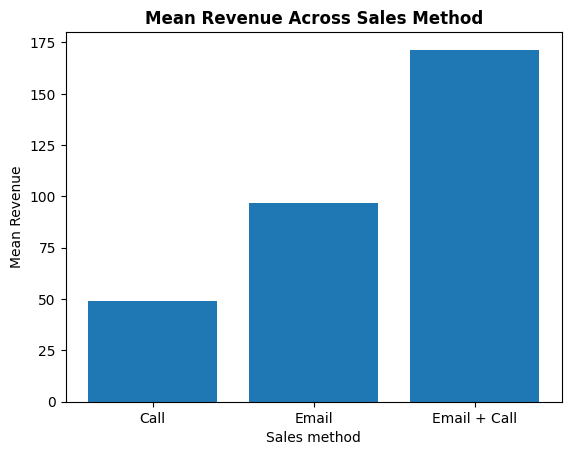

In [31]:
# sales method vs mean revenue
grouped_data=df.groupby('sales_method')['revenue'].mean()
# Plot the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Sales method')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue Across Sales Method',weight='bold')
plt.xticks(rotation=0)
plt.show()

In [32]:
grouped_data=df.groupby('sales_method')['revenue'].mean()
print("mean Email revenue:", grouped_data['Email'])
print("mean Call revenue:", grouped_data['Call'])
print("mean (Email + call) revenue:", grouped_data['Email + Call'])

mean Email revenue: 96.89504939045037
mean Call revenue: 49.287729665897416
mean (Email + call) revenue: 171.47744360465416


In [33]:
# Perform the t-test
# Assuming your DataFrame has a column named 'sales_method' and 'revenue'
email_revenue = df[df['sales_method'] == 'Email']['revenue']
email_call_revenue = df[df['sales_method'] == 'Email + Call']['revenue']
t_stat, p_value = stats.ttest_ind(email_revenue, email_call_revenue)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -143.55126533281967, P-value: 0.0


# What other factors could influence sales method performance?
## Its a good step to check if years of been a customer influence sales. the count plot shown below suggests that majority of the costumers have spent about 10 to 20 years with the company while costumers with 30 to 40 years can be considered as outliers

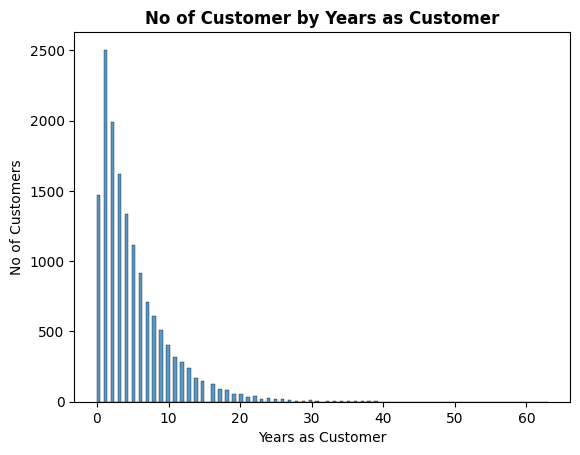

In [34]:
#sns.countplot(data=df, x=df['years_as_customer'])
sns.histplot(data=df, x=df['years_as_customer'])
plt.xlabel('Years as Customer')
plt.ylabel('No of Customers')
plt.title('No of Customer by Years as Customer',weight='bold')
plt.xticks(rotation=0)
plt.show()

# A mean plot of years as customer with sales methods clearly showed that the time spent as customer of the company did not influence sales method, as the average number of years of customers across the sales methods is approximately 5 years.

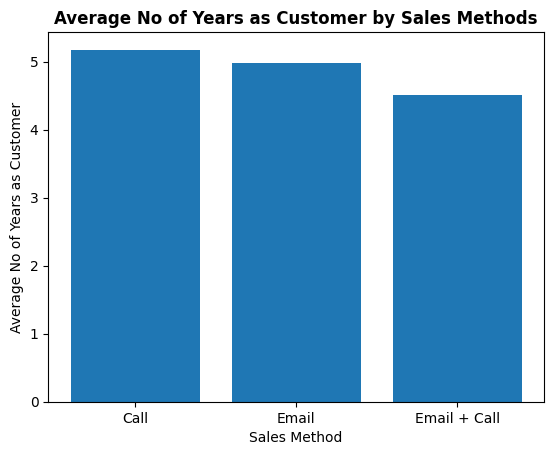

In [35]:
# sales method vs Years as Customer
grouped_data=df.groupby('sales_method')['years_as_customer'].mean()
# Plot the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Sales Method')
plt.ylabel('Average No of Years as Customer')
plt.title('Average No of Years as Customer by Sales Methods',weight='bold')
plt.xticks(rotation=0)
plt.show()

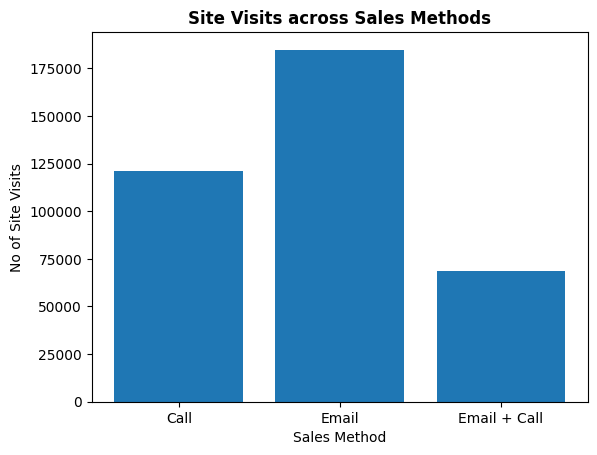

In [36]:
# sales method vs No of Site Visits
grouped_data=df.groupby('sales_method')['nb_site_visits'].sum()
# Plot the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Sales Method')
plt.ylabel('No of Site Visits')
plt.title('Site Visits across Sales Methods',weight='bold')
plt.xticks(rotation=0)
plt.show()

# The mean number of site visits is also insignificant indicating that averag frequency of site visits is fairly distributed across sales methods and does not influence it.

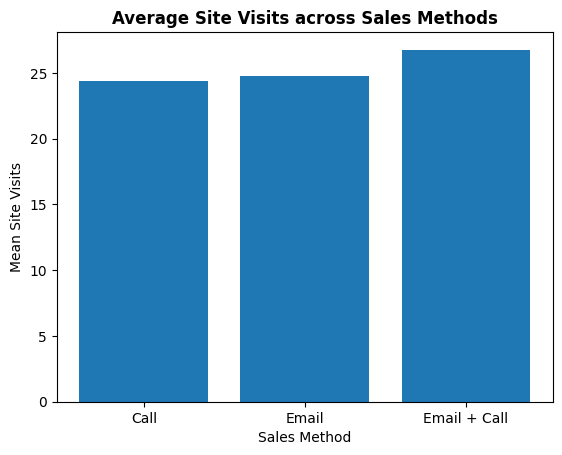

In [37]:
# sales method vs Site Visits
grouped_data=df.groupby('sales_method')['nb_site_visits'].mean()
# Plot the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Sales Method')
plt.ylabel('Mean Site Visits')
plt.title('Average Site Visits across Sales Methods',weight='bold')
plt.xticks(rotation=0)
plt.show()

In [38]:
grouped_data=df.groupby('sales_method')['nb_site_visits'].mean()
print("mean No of site visits by Email group:", grouped_data['Email'])
print("mean No of site visits by Call group:", grouped_data['Call'])
print("mean No of site visits by (Email + call) group:", grouped_data['Email + Call'])

mean No of site visits by Email group: 24.754353067238146
mean No of site visits by Call group: 24.423821039903263
mean No of site visits by (Email + call) group: 26.771384136858476


# Recommendation
## To improve sales, it can be seen from the state plots by number of items sold  and by Revenue that some states like California, Texas, New York, Florida recorded very high sales and subsequently high revenue returns. I therefore suggest that sales promotions (Email + Call) be intensified in the top 10 states with highest sales.

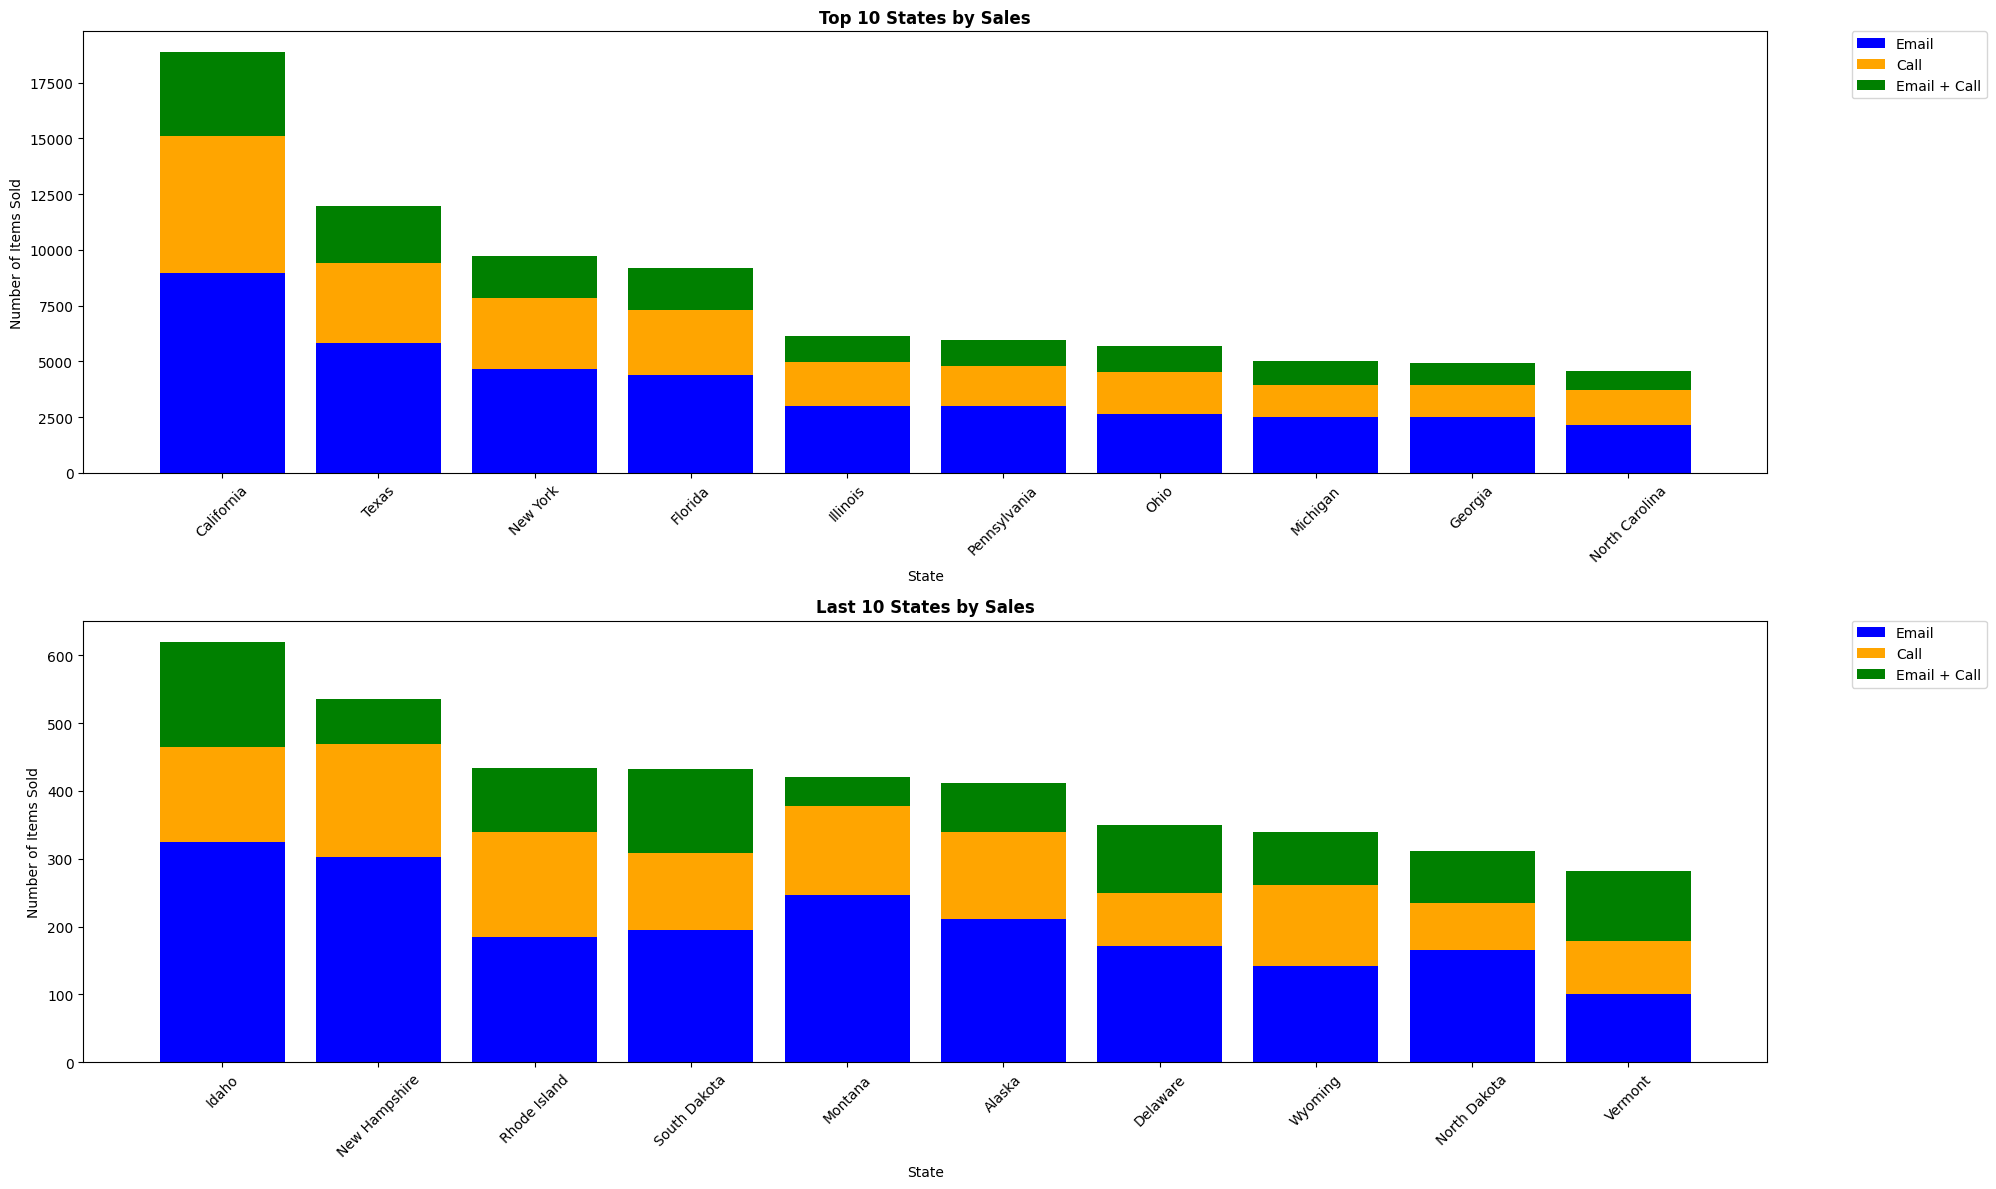

In [39]:

# Pivot the data to create a stacked bar chart
pivot_data = df.pivot_table(index='state', columns='sales_method', values='nb_sold', aggfunc='sum', fill_value=0)

# Add a total sales column for sorting
pivot_data['Total Sales'] = pivot_data.sum(axis=1)

# Sort the DataFrame based on Total Sales in descending order
pivot_data = pivot_data.sort_values('Total Sales', ascending=False)

# Split the data into top 10 and last 10
top_10 = pivot_data.head(10)
last_10 = pivot_data.tail(10)

# Set the figure size and create subplots
plt.figure(figsize=(20, 12))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot

# Plot the top 10 states
plt.bar(top_10.index, top_10['Email'], label='Email', color='blue')
plt.bar(top_10.index, top_10['Call'], bottom=top_10['Email'], label='Call', color='orange')
plt.bar(top_10.index, top_10['Email + Call'], bottom=top_10['Email'] + top_10['Call'], label='Email + Call', color='green')

plt.title('Top 10 States by Sales',weight='bold')
plt.xlabel('State')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot

# Plot the last 10 states
plt.bar(last_10.index, last_10['Email'], label='Email', color='blue')
plt.bar(last_10.index, last_10['Call'], bottom=last_10['Email'], label='Call', color='orange')
plt.bar(last_10.index, last_10['Email + Call'], bottom=last_10['Email'] + last_10['Call'], label='Email + Call', color='green')

plt.title('Last 10 States by Sales',weight='bold')
plt.xlabel('State')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


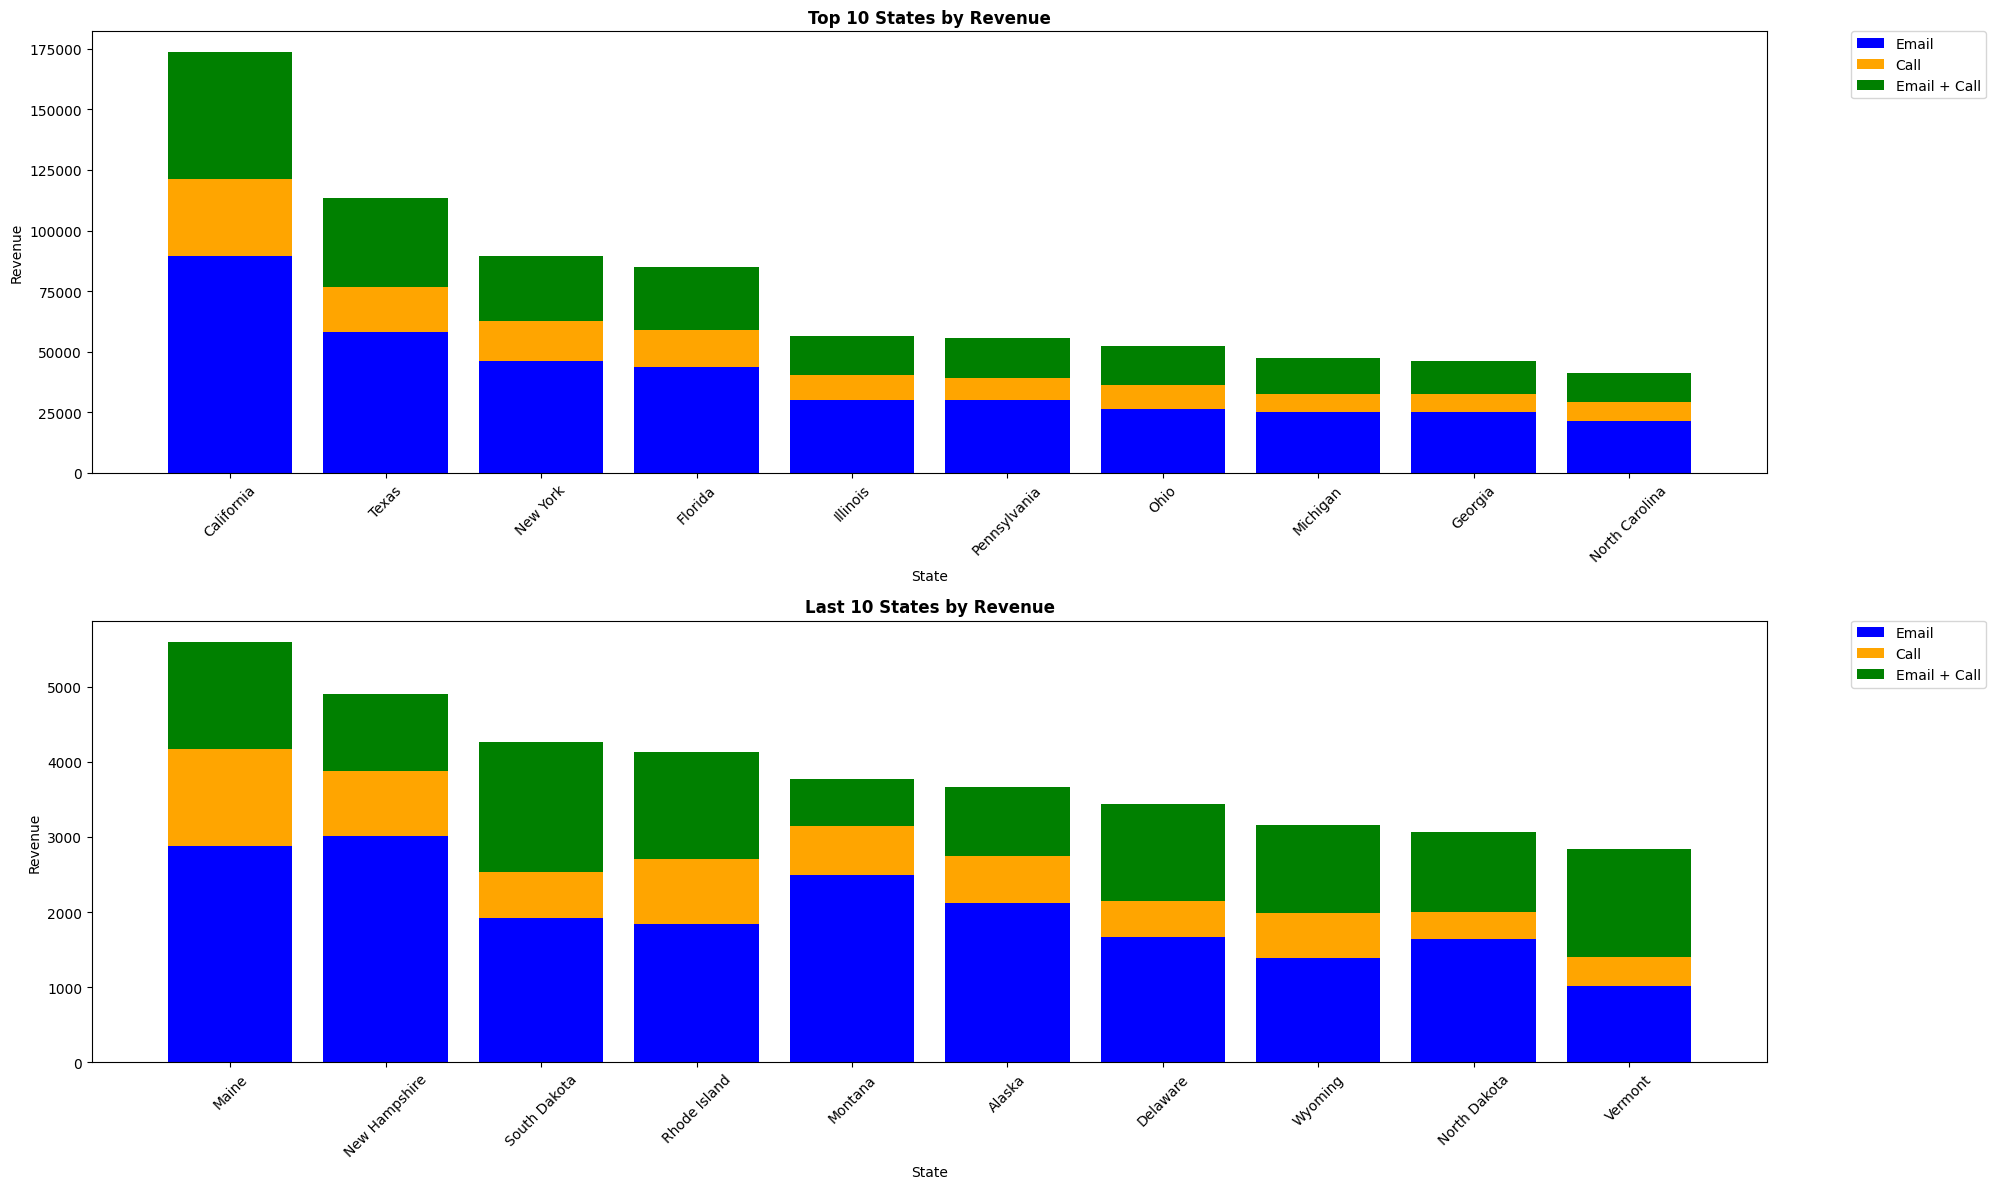

In [40]:
#import matplotlib.pyplot as plt

# Assuming df is your DataFrame and the required libraries (pandas, matplotlib) are imported.

# Pivot the data to create a stacked bar chart
pivot_data = df.pivot_table(index='state', columns='sales_method', values='revenue', aggfunc='sum', fill_value=0)

# Add a total sales column for sorting
pivot_data['Total Revenue'] = pivot_data.sum(axis=1)

# Sort the DataFrame based on Total Sales in descending order
pivot_data = pivot_data.sort_values('Total Revenue', ascending=False)

# Split the data into top 10 and last 10
top_10 = pivot_data.head(10)
last_10 = pivot_data.tail(10)

# Set the figure size and create subplots
plt.figure(figsize=(20, 12))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot

# Plot the top 10 states
plt.bar(top_10.index, top_10['Email'], label='Email', color='blue')
plt.bar(top_10.index, top_10['Call'], bottom=top_10['Email'], label='Call', color='orange')
plt.bar(top_10.index, top_10['Email + Call'], bottom=top_10['Email'] + top_10['Call'], label='Email + Call', color='green')

plt.title('Top 10 States by Revenue',weight='bold')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot

# Plot the last 10 states
plt.bar(last_10.index, last_10['Email'], label='Email', color='blue')
plt.bar(last_10.index, last_10['Call'], bottom=last_10['Email'], label='Call', color='orange')
plt.bar(last_10.index, last_10['Email + Call'], bottom=last_10['Email'] + last_10['Call'], label='Email + Call', color='green')

plt.title('Last 10 States by Revenue',weight='bold')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()